# Chapter 11: Numerical and Monte Carlo Methods

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

## 11.1 Numerical Integration Methods in One Dimension

Evaluate

$$ F = \int_a^b f(x) dx$$

Only a few integrals can be done analytically; most functions must be integrated numerically.

Assume we have  a function $f_i = f(x_i)$ which can be evaluated at the points $x_i$ for $ i = 0 \dots n$ where 

$$\Delta x = \frac{b-a}{n}$$

and

$$x_i=a + i \Delta x.$$

As an example, consider

$$ f(x) = \cos(x) $$ 

on the interval $[0, \pi/2]$

Analytically, we know that

$$ \int_0^{\pi/2} \cos(x) dx = \sin(\pi/2) - \sin(0) = 1$$

### Rectangle rule

In [131]:
@ipywidgets.interact(n=(1, 200))
def plot_rect_rule(n=8):
    
    a = 0
    b = np.pi/2
    
    dx = (b-a) / n

    x = np.linspace(a, b, 100)
    f = lambda x: np.cos(x)

    fig, ax = plt.subplots(figsize=(10,4))
    plt.plot(x, f(x), 'k')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xticks([0, np.pi/4, np.pi/2], ['0', '$\pi/4$', '$\pi/2$'])
    plt.ylim(0, 1.1)
    plt.xlim(xmin=0)

    for i in range(n):
        x = i*dx

        xi = np.linspace(x, x+dx, 20)
        ax.fill(np.hstack([xi, x+dx]), 
                np.hstack([f(xi), f(x)]))
        plt.plot([x, x], [0, f(x)], 'k', linewidth=0.5)

    ### rectangle rule ###    
    sum = 0
    for i in range(n):
        sum += f(a+i*dx) * dx
    
    plt.text(0.1, 0.2, 
             '$\\int_0^{{\pi/2}}\\cos(x) dx \\approx {:.4f}$'.format(sum), 
             bbox=dict(facecolor='white'),
             fontsize=12)
    plt.show()

interactive(children=(IntSlider(value=8, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

Rectangle rule:

$$ \int_a^b f(x) dx \approx  \sum_{i=0}^{n-1} f(x_i)\Delta x $$

### Trapezoid Rule

In [133]:
@ipywidgets.interact(n=(1, 200))
def plot_trap_rule(n=8):
    
    a = 0
    b = np.pi/2
    
    dx = (b-a) / n

    x = np.linspace(0, np.pi/2, 100)
    f = lambda x: np.cos(x)

    fig, ax = plt.subplots(figsize=(10,4))
    plt.plot(x, f(x), 'k')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xticks([0, np.pi/4, np.pi/2], ['0', '$\pi/4$', '$\pi/2$'])
    plt.ylim(0, 1.1)
    plt.xlim(xmin=0)

    for i in range(n):
        x = i*dx

        xi = np.linspace(x, x+dx, 20)
        ax.fill(np.hstack([xi, x+dx]), 
                np.hstack([f(xi), f(x+dx)]), 
                )
        plt.plot([x, x], [0, f(x)], 'k', linewidth=0.5)

    ### trapezoid rule ###
    sum = (f(a) + f(b))/2
    for i in range(1, n):
        sum += f(a+i*dx)
    sum *= dx
    
    plt.text(0.1, 0.2, 
             '$\\int_0^{{\pi/2}}\\cos(x) dx \\approx {:.4f}$'.format(sum), 
             bbox=dict(facecolor='white'),
             fontsize=12)
    plt.show()

interactive(children=(IntSlider(value=8, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

Trapezoid rule:

$$\int_a^b f(x) dx \approx \Delta x \left (\frac{1}{2} f(x_0) + \frac{1}{2} f(x_{n})+ \sum_{i=1}^{n-1} f(x_i) \right) $$

Notice that we have $n$ rectangles or trapezoids but $n+1$ points in total.

In [134]:
def compute_rect(n):
    f = lambda x: np.cos(x)
        
    a = 0
    b = np.pi/2
    
    dx = (b-a) / n
    
    sum = 0
    for i in range(n):
        sum += f(a+i*dx) * dx
        
    return sum

def compute_trap(n):
    f = lambda x: np.cos(x)
        
    a = 0
    b = np.pi/2
    
    dx = (b-a) / n
    
    sum = (f(a) + f(b))/2
    for i in range(1, n):
        sum += f(a+i*dx)
    sum *= dx
        
    return sum

In [138]:
N = 2**np.arange(1, 11)

Δrect = []
Δtrap = []
for n in N:
    rect = compute_rect(n)
    error_rect = abs(rect - 1.0)
    Δrect.append(error_rect)
    
    trap = compute_trap(n)
    error_trap = abs(trap - 1.0)
    Δtrap.append(error_trap)

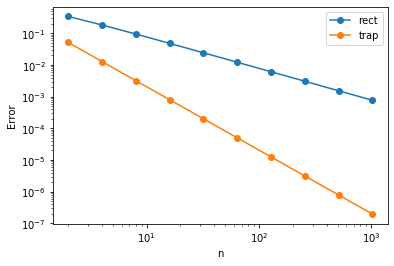

In [142]:
plt.loglog(N, Δrect, 'o-', label='rect')
plt.loglog(N, Δtrap, 'o-', label='trap')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

### Simpson's Rule

<a title="Popletibus This W3C-unspecified vector image was created with Inkscape. [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Simpsons_method_illustration.svg"><img width="256" alt="Simpsons method illustration" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/256px-Simpsons_method_illustration.svg.png"></a>

Idea: fit a parabola through three points
- work with consecutive triplets
- need an odd number of points

Consider 

$$ \int_{-1}^{1} f(x) dx $$

approximate  $ f(x) \approx \alpha x^2 + \beta x + \gamma $ (like a 2$^\text{nd}$ order Taylor series)

$$\begin{align}
\int_{-1}^{1} f(x) dx & = \int_{-1}^{1}\alpha x^2 + \beta x + \gamma  dx \\
&= \frac{2}{3} \alpha + 2 \gamma 
\end{align}$$


Now, 

$$\begin{align}
f(-1) &= \alpha - \beta + \gamma \\
f(0) &= \gamma  \quad\quad\quad\quad \rightarrow \gamma = f(0) \\
f(1) &= \alpha + \beta + \gamma
\end{align}$$

solve for $\alpha$

$$
\begin{align}
f(-1) + f(1) &= 2\alpha + 2\gamma \\
\alpha &= \frac{f(-1) + f(1)}{2} -f(0)
\end{align}
$$


so

$$\begin{align}
\int_{-1}^{1} f(x) dx & \approx \frac{2}{3} \alpha + 2 \gamma  \\
& = \frac{2}{3} \left( \frac{f_{-1} + f_{1}}{2} - f_0\right) + 2 f_0 \\
& = \frac{1}{3}f_{-1} + \frac{4 }{3}f_0 + \frac{1}{3}f_1
\end{align}$$

Approximating the intergal with three function calls with these weights is equivalent to approximating curve with a parabola.

This generalizes to

$$
\int_{x_i -h }^{x_i + h} f(x) dx \approx  \frac{h}{3}f_{i-1} + \frac{4h }{3}f_i + \frac{h}{3}f_{i+1}$$

where $f_i = f(x_i)$ and $f_{i\pm1} = f(x_{i\pm 1}) = f(x_i \pm h)$.

#### Example

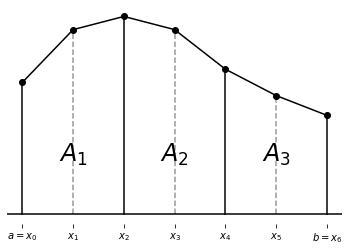

In [143]:
fig, ax = plt.subplots()
plt.axhline(0, color='k')
##plt.axis(False)
x = [0, 1, 2, 3, 4, 5, 6]
y = [2, 2.8, 3, 2.8, 2.2, 1.8, 1.5]
plt.plot(x, y, 'ko-')
for x0, y0 in zip(x, y):
    if x0 % 2 == 0:
        style = 'k-'
        alpha = 1
    else:
        style = 'k--'
        alpha = 0.4
    plt.plot([x0, x0], [0, y0], style, alpha=alpha)

ax.axes.get_yaxis().set_visible(False)
plt.xticks(x, 
           ['$a = x_0$','$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$', '$b=x_6$'])
plt.box(False)
plt.text(1, .8, '$A_1$', size=24, horizontalalignment='center')
plt.text(3, .8, '$A_2$', size=24, horizontalalignment='center')
plt.text(5, .8, '$A_3$', size=24, horizontalalignment='center')
plt.show()

7 points, $n = 6$ slabs, 3 areas.

$$\begin{align}
\int_a^b f(x) dx &=  A_1 \quad\quad + \quad\quad A_2 \quad\quad+\quad\quad A_3 \\
 &= \int_{x_1 - h}^{x_1+h} f(x) dx + \int_{x_3 - h}^{x_3+h} f(x) dx + \int_{x_5 - h}^{x_5+h} f(x) dx \\
\end{align}$$


$$\begin{align}
&= \left( \frac{h}{3}f_0 + \frac{4h }{3}f_1 + \frac{h}{3}f_2 \right) + 
\left( \frac{h}{3}f_2 + \frac{4h }{3}f_3 + \frac{h}{3}f_4 \right) + 
\left( \frac{h}{3}f_4 + \frac{4h }{3}f_5 + \frac{h}{3}f_6 \right) \\
&= \frac{h}{3} \left( f_0 + 4 f_1 + 2 f_2 + 4 f_3 + 2 f_4 + 4 f_5 + f_6\right)
\end{align}$$

In general, with $n+1$ points ($n$ even),

$$ \int_a^b f(x) dx = \frac{h}{3} \left( f_0 + 4 f_1 + 2 f_2 + \ldots + 2 f_{n-2} + 4 f_{n-1} + f_n\right) $$

Odd points multiplied by 4, even interior points multipled by 2.

$$ = \frac{h}{3} \left ( f_0 + 4 \sum_{i\;\text{odd}} f_i + 2 \sum_{i\;\text{even}} f_i + f_n \right) $$

There are $\frac{n}{2}$ odd points and $\frac{n}{2} - 1$ even interior points.

From *Wikipedia*: An animation showing how Simpson's rule approximation improves with more strips.
<a title="Mkwadee [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Simpsonsrule2.gif"><img width="512" alt="Simpsonsrule2" src="https://upload.wikimedia.org/wikipedia/commons/6/67/Simpsonsrule2.gif"></a>

In [144]:
def compute_simpson(n):
    f = lambda x: np.cos(x)
        
    a = 0
    b = np.pi/2
    
    dx = (b-a) / n
    
    x_0 = a + 0*dx # a
    x_n = a + n*dx # b
    sum = f(x_0) + f(x_n)

    for i in range(1, n):
        x_i = a + i*dx
        f_i = f(x_i)
        if i%2==0:
            sum += 2*f_i
        else:
            sum += 4*f_i
            
    sum = sum * dx/3
    return sum

In [150]:
N = 2**np.arange(1, 11)

Δsimpson = []
for n in N:
    simpson = compute_simpson(n)
    error_simpson = abs(simpson - 1.0)
    Δsimpson.append(error_simpson)

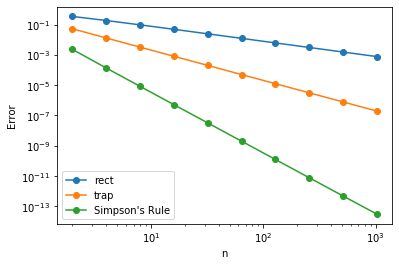

In [151]:
plt.loglog(N, Δrect, 'o-', label='rect')
plt.loglog(N, Δtrap, 'o-', label='trap')
plt.loglog(N, Δsimpson, 'o-', label="Simpson's Rule")
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

See Appendix 11A: Error Estimates for Numerical Integration for a derivation of the errors of these three methods based on Taylor series.